In [1]:
# Repeated Unimodal and Multimodal Gaussians
# Unimodal Gaussians With Added Class
# Unimodal Gaussians in 3-D
# National Oceanic and Atmospheric Administration (NOAA)s

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 2D Gaussian with added class

In [217]:
def get_gaussian_params(t):
    if t < 0.2:
        time_index = 0
    elif t < 0.4:
        time_index = 1
    elif t < 0.6:
        time_index = 2
    elif t < 0.8:
        time_index = 3
    else:
        time_index = 4
        
    mus = [
        [[2-5*t, 5], [5-5*t, 8], [None, None]],
        [[1, 5-10*t], [4+20*t, 8+2*t], [None, None]],
        [[1, 3-5*t], [8, 8+5*t], [5, 5+5*t]],
        [[1-5*t, 4+2*t], [8, 8+6*t], [5+2*t, 3-2*t]],
        [[0+5*t, 5+5*t], [8, 6-10*t], [4-5*t, 3+2*t]]
    ]
    sigmas = [
        [[[1.5, 0], [0, 5-5*t]], [[5-15*t, 0], [0, 1.5+2.5*t]], [[None, None], [None, None]]],
        [[[1.5+7.5*t, 0], [0, 3]], [[2, 0], [0, 2]], [[None, None], [None, None]]],
        [[[3+5*t, 0], [0, 3-5*t]], [[2+3*t, 0], [0, 2+3*t]], [[1+5*t, 0], [0, 1+5*t]]],
        [[[1+15*t, 0], [0, 1]], [[1, 0], [0, 4-10*t]], [[2, 0], [0, 2+5*t]]],
        [[[4-10*t, 0], [0, 1+10*t]], [[1+5*t, 0], [0, 2]], [[2+5*t, 0], [0, 3]]]
    ]
    
    return mus[time_index], sigmas[time_index]


def generate_gaussian_data():
    timesteps = np.arange(0, 1.01, 0.01)
    new_class_threshold = 0.4
    
    data = []
    
    for t in timesteps:
        num_classes = 2 if t < new_class_threshold else 3
        
        mus, sigmas = get_gaussian_params(t)  
        samples = [np.random.multivariate_normal(mus[class_], sigmas[class_], 100) for class_ in range(num_classes)]
            
        data.append(samples)
        
    return data

In [218]:
samples = generate_gaussian_data()

/var/folders/4y/9c2ky1kj17bbs57dxvtb7yn40019d2/T/ipykernel_24247/4181902296.py:41: RuntimeWarning: covariance is not positive-semidefinite.
  samples = [np.random.multivariate_normal(mus[class_], sigmas[class_], 100) for class_ in range(num_classes)]


In [219]:
len(samples)

101

In [220]:
samples[30][0]

array([[-1.95267578,  0.74510021],
       [ 1.25235617,  4.84521206],
       [ 0.47791326, -1.15382364],
       [ 4.64393909, -0.70754947],
       [ 1.72765872, -1.45173208],
       [ 3.68210308,  1.65886583],
       [ 1.42808732,  0.95908549],
       [-1.29062694,  0.84883298],
       [ 0.6817584 , -0.83657685],
       [-2.2070326 , -1.57472079],
       [ 0.10593742,  2.2209924 ],
       [-1.74849198,  3.97566   ],
       [-2.53114759,  3.49062901],
       [-2.65417812,  2.35271129],
       [ 0.83304151,  1.91728231],
       [ 1.40164846,  4.2052677 ],
       [ 1.46721773,  3.48120451],
       [ 1.394453  ,  5.0346928 ],
       [ 0.49933027,  3.77272043],
       [ 3.23772897,  4.00342542],
       [-1.98788446,  4.58766942],
       [-1.14958863, -0.92468722],
       [ 4.40140553,  3.27865461],
       [ 0.27249068,  2.30794128],
       [ 2.17722029,  2.87886325],
       [ 3.15183156,  2.9845605 ],
       [ 0.08802839,  4.16040343],
       [-2.20315416,  0.12553772],
       [ 1.36920165,

In [221]:
colors = cm.rainbow(np.linspace(0, 1, 3))

def plot_data(t, samples):
    new_class_threshold = 0.4
    num_classes = 2 if t < new_class_threshold else 3
    idx = int(100*t)
    examples = [samples[idx][class_] for class_ in range(num_classes)]
    for example, color in zip(examples, colors[:num_classes]):
        plt.scatter(example[:, 0], example[:, 1], color=color)
    plt.show()

t = 0.0


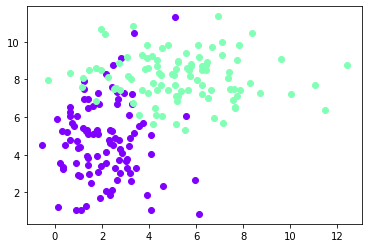

t = 0.1


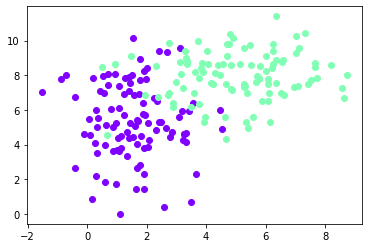

t = 0.2


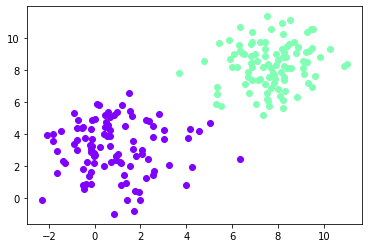

t = 0.30000000000000004


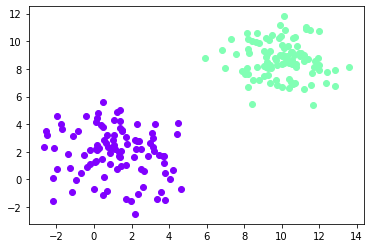

t = 0.4


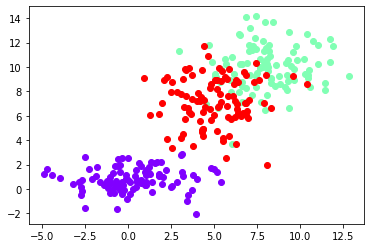

t = 0.5


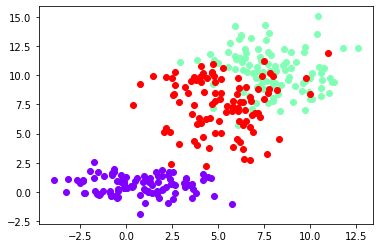

t = 0.6000000000000001


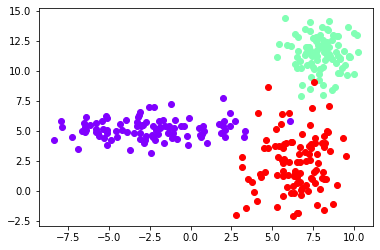

t = 0.7000000000000001


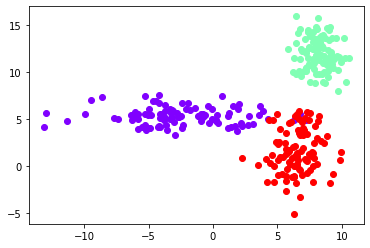

t = 0.8


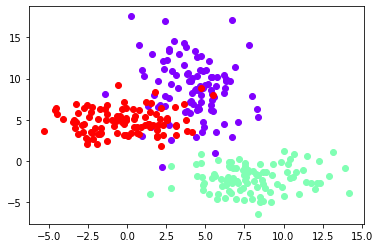

t = 0.9


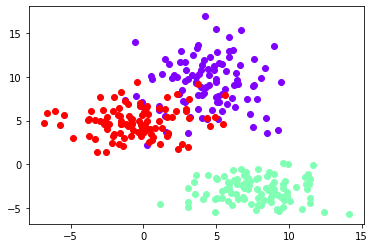

t = 1.0


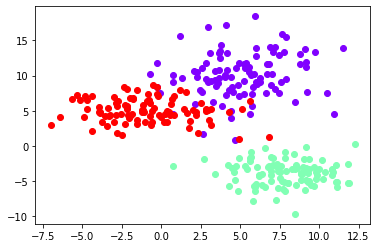

In [222]:
for timestep in np.arange(0, 1.1, 0.1):
    print(f"t = {timestep}")
    plot_data(timestep, samples)

In [223]:
data_to_save = []
for timestep, samples_for_timestep in enumerate(samples):
    new_class_threshold = 0.4
    t = timestep/100
    num_classes = 2 if t < new_class_threshold else 3
    
    data_for_timestep = []
    for class_ in range(num_classes):
        xs = samples_for_timestep[class_]
        ys = np.full(xs.shape[0], class_).reshape((100, 1))
        data = np.hstack([xs, ys])
        data_for_timestep.append(data)
    
    data_for_timestep = np.vstack(data_for_timestep)
    
    # Shuffle rows for given timestep
    np.random.shuffle(data_for_timestep)
    
    data_to_save.append(data_for_timestep)
        
data_to_save = pd.DataFrame(np.vstack(data_to_save))
data_to_save.columns = ['0', '1', 'label']
data_to_save['label'] = data_to_save['label'].astype(int)

In [224]:
data_to_save

,0,1,label
0,1.308404,5.271208,0
1,7.636019,6.484897,1
2,1.739535,5.230397,0
3,6.476510,8.927074,1
4,4.530995,9.691058,1
...,...,...,...
26295,4.074900,7.194627,0
26296,5.316763,11.061853,0
26297,8.474298,-9.663943,1
26298,7.649792,-4.999727,1


In [225]:
data_to_save.to_csv("2d_gaussian_data_v2.csv", index=False)

# 3D Gaussian

In [182]:
def get_gaussian_params_3d(t):
    if t < 0.2:
        time_index = 0
    elif t < 0.4:
        time_index = 1
    elif t < 0.6:
        time_index = 2
    elif t < 0.8:
        time_index = 3
    else:
        time_index = 4
        
    mus = [
        [[9-25*t, 1+10*t, 8-15*t], [0+10*t, 0+10*t, 3-10*t]], 
        [[4-10*t, 3+15*t, 5-15*t], [2+20*t, 2+20*t, 1+10*t]],
        [[2+15*t, 6+15*t, 2-5*t], [6-20*t, 6+10*t, 3+10*t]], 
        [[5+25*t, 9+5*t, 1-5*t], [2+25*t, 8, 5-10*t]], 
        [[10-15*t, 10-10*t, 0+15*t], [7-10*t, 8+6*t, 3-5*t]]
    ]
    sigmas = [
        [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    ]
    
    return mus[time_index], sigmas


def generate_gaussian_data_3d():
    timesteps = np.arange(0, 1.01, 0.01)
    
    data = []
    
    for t in timesteps:
        num_classes = 2
        
        mus, sigmas = get_gaussian_params_3d(t)  
        samples = [np.random.multivariate_normal(mus[class_], sigmas[class_], 100) for class_ in range(num_classes)]
        data.append(samples)
        
    return data

In [183]:
samples_3d = generate_gaussian_data_3d()

In [184]:
len(samples_3d)

101

In [185]:
samples_3d[30][0]

array([[ 2.44707387e-01,  8.30216754e+00,  7.88244956e-01],
       [ 2.21450622e+00,  7.62981912e+00,  9.09939156e-02],
       [-2.14237161e-01,  7.98878265e+00, -5.36935500e-01],
       [ 2.48516813e+00,  5.04168418e+00, -4.77762801e-01],
       [ 6.81214865e-02,  6.48941357e+00, -5.44755052e-02],
       [ 3.40468575e+00,  7.95064760e+00,  2.57932816e-01],
       [ 1.42905347e+00,  6.60905596e+00, -1.26914060e+00],
       [ 2.24021902e+00,  8.66998800e+00, -1.79368463e-01],
       [-6.34261397e-01,  7.32528235e+00,  8.22166705e-01],
       [ 7.39899877e-01,  7.07949478e+00, -5.75097194e-01],
       [ 2.22553419e+00,  6.08299354e+00,  3.54701791e-01],
       [ 8.22817101e-01,  7.10817468e+00,  2.29906403e+00],
       [ 3.36961494e-01,  7.85472976e+00,  2.24423102e+00],
       [ 2.22051226e+00,  5.35484300e+00,  9.35397129e-01],
       [ 1.51087891e+00,  6.56845972e+00,  5.12183336e-01],
       [ 2.24632157e+00,  7.43248893e+00,  5.26486553e-01],
       [-2.36376167e-01,  8.49259926e+00

In [188]:
colors = cm.rainbow(np.linspace(0, 1, 2))

def plot_data_3d(t, samples):
    num_classes = 2
    idx = int(100*t)
    examples = [samples[idx][class_] for class_ in range(num_classes)]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for example, color in zip(examples, colors[:num_classes]):
        ax.scatter(example[:, 0], example[:, 1], example[:, 2], color=color)
    plt.show()

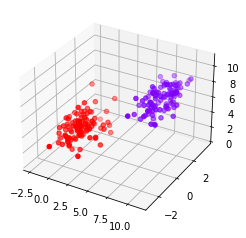

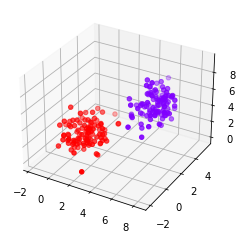

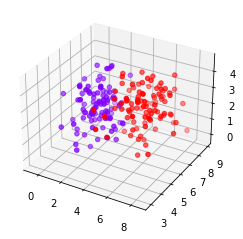

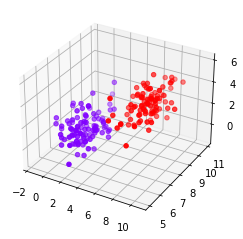

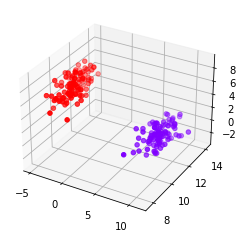

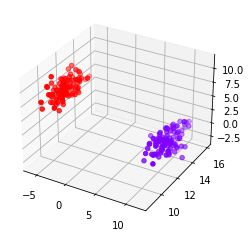

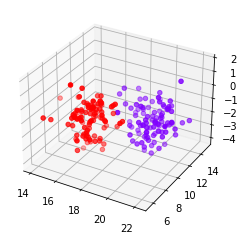

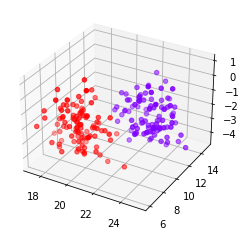

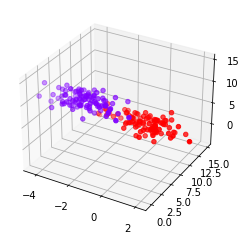

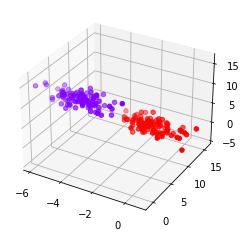

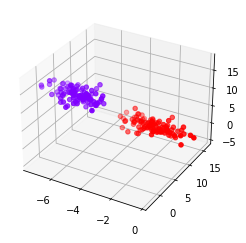

In [189]:
for timestep in np.arange(0, 1.1, 0.1):
    plot_data_3d(timestep, samples_3d)

In [16]:
data_to_save = []
for timestep, samples_for_timestep in enumerate(samples_3d):
    t = timestep/100
    num_classes = 2
    
    data_for_timestep = []
    for class_ in range(num_classes):
        xs = samples_for_timestep[class_]
        ys = np.full(xs.shape[0], class_).reshape((100, 1))
        data = np.hstack([xs, ys])
        data_for_timestep.append(data)
    
    data_for_timestep = np.vstack(data_for_timestep)
    
    # Shuffle rows for given timestep
    np.random.shuffle(data_for_timestep)
    
    data_to_save.append(data_for_timestep)
        
data_to_save = pd.DataFrame(np.vstack(data_to_save))
data_to_save.columns = ['0', '1', '2', 'label']
data_to_save['label'] = data_to_save['label'].astype(int)

In [17]:
data_to_save

,0,1,2,label
0,8.065993,2.252268,5.110438,0
1,8.683544,1.307034,7.486184,0
2,0.744888,-1.595870,4.351712,1
3,7.051441,-0.359118,8.189009,0
4,9.166792,0.016955,7.405515,0
...,...,...,...,...
20195,-0.351929,15.578012,-0.138756,1
20196,-3.427044,-0.491989,14.991807,0
20197,-6.223817,1.674321,15.022106,0
20198,-5.745635,-1.045827,13.213585,0


In [18]:
data_to_save.to_csv("3d_gaussian_data.csv", index=False)

# 3D Gaussian with added class

In [8]:
def get_gaussian_params_3d_added_class(t):
    if t < 0.2:
        time_index = 0
    elif t < 0.4:
        time_index = 1
    elif t < 0.6:
        time_index = 2
    elif t < 0.8:
        time_index = 3
    else:
        time_index = 4
        
    mus = [
        [[9-25*t, 1+10*t, 8-15*t], [0+10*t, 0+10*t, 3-10*t], [5-12*t, 4+5*t, 2-15*t]], 
        [[4-10*t, 3+15*t, 5-15*t], [2+20*t, 2+20*t, 1+10*t], [7-18*t, 1+2*t, 5-5*t]],
        [[2+15*t, 6+15*t, 2-5*t], [6-20*t, 6+10*t, 3+10*t], [2+10*t, 5-4*t, 8+10*t]], 
        [[5+25*t, 9+5*t, 1-5*t], [2+25*t, 8, 5-10*t], [5-7*t, 7+3*t, 4+20*t]], 
        [[10-15*t, 10-10*t, 0+15*t], [7-10*t, 8+6*t, 3-5*t], [3+3*t, 11-8*t, 1+30*t]]
    ]
    sigmas = [
        [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]], [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
    ]
    
    return mus[time_index], sigmas


def generate_gaussian_data_3d_added_class():
    timesteps = np.arange(0, 1.01, 0.01)
    
    data = []
    
    for t in timesteps:
        num_classes = 3
        
        mus, sigmas = get_gaussian_params_3d_added_class(t)  
        samples = [np.random.multivariate_normal(mus[class_], sigmas[class_], 100) for class_ in range(num_classes)]
        data.append(samples)
        
    return data

In [9]:
samples_3d_added_class = generate_gaussian_data_3d_added_class()

In [10]:
len(samples_3d_added_class)

101

In [15]:
samples_3d_added_class[30][0]

array([[ 0.08244808,  5.37459633, -0.5416481 ],
       [ 1.9531379 ,  6.98722584,  0.76764001],
       [ 0.11859949,  7.05898707,  1.42509873],
       [ 1.4687588 ,  7.22003971,  0.37549941],
       [ 2.64132556,  7.82394765, -2.12139808],
       [-0.16423658,  7.50141552, -2.41730909],
       [ 0.4962711 ,  6.95329139,  0.23863704],
       [ 2.08996008,  7.44692972,  1.26072792],
       [ 0.56652666,  7.84564127,  0.60962683],
       [-0.03120681,  6.18105711,  0.73200282],
       [ 0.59258675,  6.90742985, -0.09316115],
       [ 1.18276734,  8.06063159, -0.54863959],
       [ 0.33090234,  7.10431728,  2.5260939 ],
       [ 0.25670673,  7.18957169,  1.72576662],
       [ 0.72937199,  6.76999261, -0.01337728],
       [ 0.65609209,  8.9944997 , -1.24168074],
       [ 0.73670982,  8.48456806, -0.31055614],
       [ 1.61288604,  7.26787991, -0.04280341],
       [ 0.67184782,  8.4342779 ,  1.47635324],
       [ 1.36189337,  6.10425198,  1.94987974],
       [ 0.7442212 ,  7.88464977,  1.674

In [17]:
colors = cm.rainbow(np.linspace(0, 1, 3))

def plot_data_3d_added_class(t, samples):
    num_classes = 3
    idx = int(100*t)
    examples = [samples[idx][class_] for class_ in range(num_classes)]
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for example, color in zip(examples, colors[:num_classes]):
        ax.scatter(example[:, 0], example[:, 1], example[:, 2], color=color)
    plt.show()

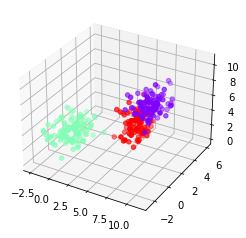

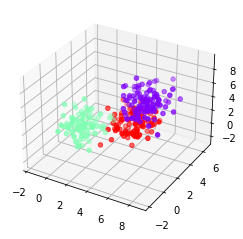

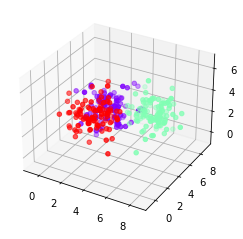

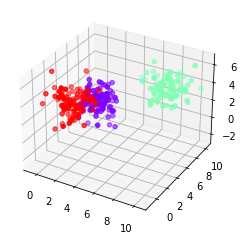

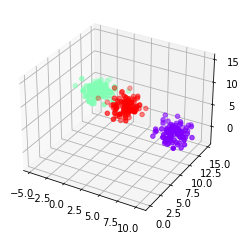

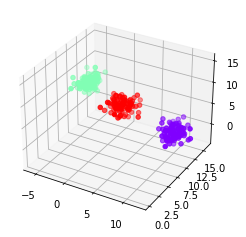

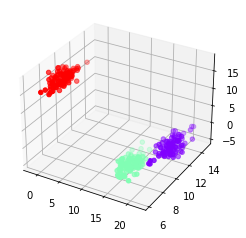

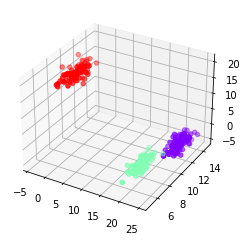

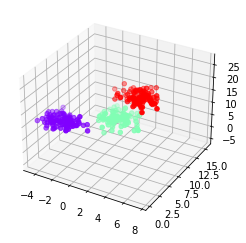

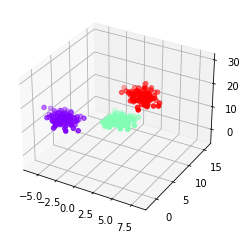

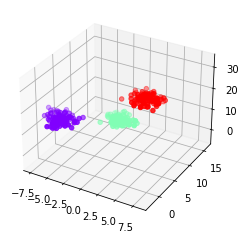

In [18]:
for timestep in np.arange(0, 1.1, 0.1):
    plot_data_3d_added_class(timestep, samples_3d_added_class)

In [19]:
data_to_save = []
for timestep, samples_for_timestep in enumerate(samples_3d_added_class):
    t = timestep/100
    num_classes = 3
    
    data_for_timestep = []
    for class_ in range(num_classes):
        xs = samples_for_timestep[class_]
        ys = np.full(xs.shape[0], class_).reshape((100, 1))
        data = np.hstack([xs, ys])
        data_for_timestep.append(data)
    
    data_for_timestep = np.vstack(data_for_timestep)
    
    # Shuffle rows for given timestep
    np.random.shuffle(data_for_timestep)
    
    data_to_save.append(data_for_timestep)
        
data_to_save = pd.DataFrame(np.vstack(data_to_save))
data_to_save.columns = ['0', '1', '2', 'label']
data_to_save['label'] = data_to_save['label'].astype(int)

In [20]:
data_to_save

,0,1,2,label
0,-1.015156,-1.416118,1.951099,1
1,5.208060,4.172179,2.880507,2
2,0.597843,-0.436511,4.445444,1
3,-2.077018,-1.567381,3.164351,1
4,0.508987,0.178724,2.521768,1
...,...,...,...,...
30295,-3.335993,13.677460,-1.803764,1
30296,-4.649125,14.419453,-1.387620,1
30297,-4.854797,-2.402292,14.421508,0
30298,-2.277949,14.327081,-1.009631,1


In [21]:
data_to_save.to_csv("3d_gaussian_data_added_class.csv", index=False)